# Random Forest Classification- Income Qualification

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
os.chdir("G:\\Vibhuti\\business analytics and intelligence\\simplilearn\\machinelearning\\ML_Projects_Simplilearn\\IncomeQualification")

In [3]:
df = pd.read_csv("train.csv")

In [4]:
df.head(3)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.00,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.00,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.25,64.0,121.0,8464,4


In [5]:
df['dependency'].replace('yes', '1', inplace= True)
df['dependency'].replace('no', '0', inplace= True)
df['edjefe'].replace('yes', '1', inplace= True)
df['edjefe'].replace('no', '0', inplace= True)
df['edjefa'].replace('yes', '1', inplace= True)
df['edjefa'].replace('no', '0', inplace= True)

In [6]:
df.drop(['idhogar','Id'], axis = 1, inplace = True)

In [7]:
df.fillna(-999, inplace = True)

In [8]:
df.isnull().sum().sum()

0

In [ ]:

features =df.iloc[:, 0:140] 
# Separating out the features
x = df.iloc[:, 0:140]
# Separating out the target
y =df.iloc[:, 140]
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [ ]:

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 2'])

In [ ]:
finalDf = pd.concat([principalDf, df[['Target']]], axis = 1)

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1,2,3,4]
colors = ['r', 'g', 'b', 'y']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Target'] == Target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)

ax.set_title('2 component PCA', fontsize = 20)
targets = ['1','2','3','4']
colors = ['r', 'g', 'b','y']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
pca.explained_variance_ratio_

In [9]:
from sklearn.model_selection import train_test_split

In [11]:
X = df.iloc[:, 0:140]
X

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,190000.0,0,3,0,1,1,0,-999.0,0,1,...,43,100,1849,1,100,0,1.000000,0.0000,100.0000,1849
1,135000.0,0,4,0,1,1,1,1.0,0,1,...,67,144,4489,1,144,0,1.000000,64.0000,144.0000,4489
2,-999.0,0,8,0,1,1,0,-999.0,0,0,...,92,121,8464,1,0,0,0.250000,64.0000,121.0000,8464
3,180000.0,0,5,0,1,1,1,1.0,0,2,...,17,81,289,16,121,4,1.777778,1.0000,121.0000,289
4,180000.0,0,5,0,1,1,1,1.0,0,2,...,37,121,1369,16,121,4,1.777778,1.0000,121.0000,1369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,80000.0,0,6,0,1,1,0,-999.0,0,2,...,46,81,2116,25,81,1,1.562500,0.0625,68.0625,2116
9553,80000.0,0,6,0,1,1,0,-999.0,0,2,...,2,0,4,25,81,1,1.562500,0.0625,68.0625,4
9554,80000.0,0,6,0,1,1,0,-999.0,0,2,...,50,25,2500,25,81,1,1.562500,0.0625,68.0625,2500
9555,80000.0,0,6,0,1,1,0,-999.0,0,2,...,26,121,676,25,81,1,1.562500,0.0625,68.0625,676


In [12]:
y = df.iloc[:, 140]
y

0       4
1       4
2       4
3       4
4       4
       ..
9552    2
9553    2
9554    2
9555    2
9556    2
Name: Target, Length: 9557, dtype: int64

In [13]:
train_img, test_img, train_lbl, test_lbl = train_test_split( X, y, test_size=1/7.0, random_state=0)

In [14]:
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(train_img)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [15]:
# Apply transform to both the training set and the test set.
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

In [16]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)

In [17]:
pca.fit(train_img)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [18]:
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

In [19]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

In [20]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=20, random_state=0)
classifier.fit(train_img, train_lbl)
y_pred = classifier.predict(test_img)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(test_lbl,y_pred))
print(classification_report(test_lbl,y_pred))
print(accuracy_score(test_lbl, y_pred))

[[ 42  11   4  45]
 [  4 114   7 114]
 [  2  11  58 109]
 [  2  22  10 811]]
              precision    recall  f1-score   support

           1       0.84      0.41      0.55       102
           2       0.72      0.48      0.57       239
           3       0.73      0.32      0.45       180
           4       0.75      0.96      0.84       845

    accuracy                           0.75      1366
   macro avg       0.76      0.54      0.60      1366
weighted avg       0.75      0.75      0.72      1366

0.7503660322108345


In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
conf_mat = confusion_matrix(test_lbl, y_pred)
print(conf_mat)

[[ 42  11   4  45]
 [  4 114   7 114]
 [  2  11  58 109]
 [  2  22  10 811]]


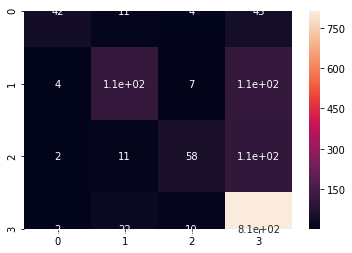

In [24]:
import seaborn
seaborn.heatmap(conf_mat,annot=True)
plt.show()